In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('UWRL_river_velocimetry_dataset.csv')
df = pd.read_csv('UWRL_river_velocimetry_dataset_NEW.csv')

In [3]:
df['v_pos'] =  [0 if pd.isna(x) else (-1 if x < 0 else 1) for x in df['v_x']]
df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
df

Index(['datetime', 'x', 'y', 'v_x', 'v_y', 'velocity', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'turbidity', 'vegetation', 'visibility',
       'cloudcover', 'solarradiation', 'uvindex', 'conditions', 'angle',
       'v_pos'],
      dtype='object')


,datetime,x,y,v_x,v_y,velocity,s2n,corr,sun_altitude,sun_azimuth,...,LRO_discharge_site,turbidity,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,angle,v_pos
0,2024-04-10 13:38:23,0.155,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
1,2024-04-10 13:38:23,0.285,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
2,2024-04-10 13:38:23,0.415,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
3,2024-04-10 13:38:23,0.545,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
4,2024-04-10 13:38:23,0.675,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999996,2024-04-16 06:48:12,10.815,2.495,0.249444,0.027593,0.250966,2.11600,0.35096,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.110168,1
8999997,2024-04-16 06:48:12,10.945,2.495,0.488962,0.196981,0.527149,1.96440,0.34064,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.382966,1
8999998,2024-04-16 06:48:12,11.075,2.495,0.198783,0.153478,0.251138,1.97728,0.31744,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.657490,1
8999999,2024-04-16 06:48:12,11.205,2.495,0.444174,0.226174,0.498443,2.04792,0.33272,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.470981,1


<Axes: xlabel='turbidity', ylabel='Count'>

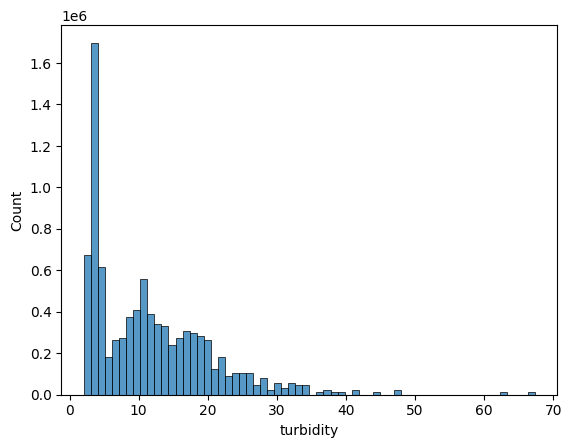

In [4]:
sns.histplot(
    data=df,
    x='turbidity',
    bins=64
)

<Axes: xlabel='datetime', ylabel='turbidity'>

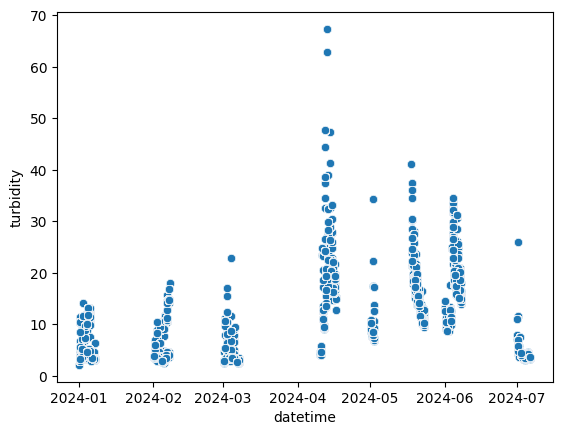

In [5]:
sns.scatterplot(
    data=df,
    x='datetime',
    y='turbidity'
)

<Axes: xlabel='LRO_discharge', ylabel='turbidity'>

/home/hfluke/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/hfluke/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


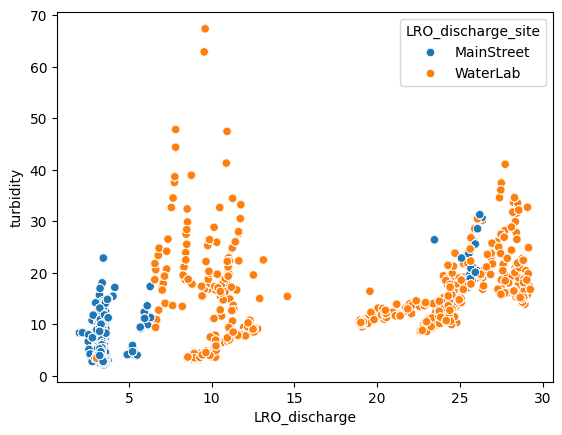

In [6]:
sns.scatterplot(
    data=df,
    x='LRO_discharge',
    y='turbidity',
    hue='LRO_discharge_site'
)

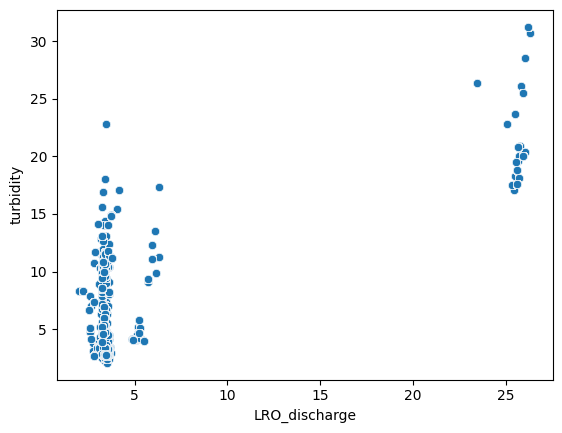

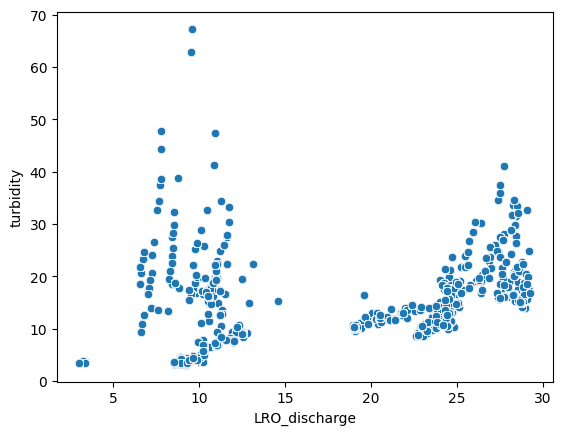

In [7]:
sns.scatterplot(
    data=df[df.LRO_discharge_site == 'MainStreet'],
    x='LRO_discharge',
    y='turbidity',
)
plt.show()

sns.scatterplot(
    data=df[df.LRO_discharge_site == 'WaterLab'],
    x='LRO_discharge',
    y='turbidity',
)
plt.show()